# Project: Wrangling and Analyze Data

## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import os
%matplotlib inline
from timeit import default_timer as timer
import pingouin

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
predictions_file = 'image-predictions.tsv'

if os.path.isfile(predictions_file) is False:
    
    response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
    with open(predictions_file, mode='wb') as file:
        file.write(response.content)
    
df_image = pd.read_csv(predictions_file, sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

In [5]:
def get_lines(file, line_numbers):
    return (x for i, x in enumerate(file) if i in line_numbers)

In [6]:
tweets_file = 'tweet_json.txt'

if os.path.isfile(tweets_file) is False:
    
    with open('TwitterAPI.txt', mode='r') as file:
        
        lines = get_lines(file, [1, 2, 3, 4])
        counter = 1
        for line in lines:
            if counter == 1:
                consumer_key = line.split('_')[1].strip()
            if counter == 2:
                consumer_secret = line.split('_')[1].strip()
            if counter == 3:
                access_token = line.split('_')[1].strip()
            if counter == 4:
                access_secret = line.split('_')[1].strip()
            counter += 1
        
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    
    api = tweepy.API(auth, wait_on_rate_limit=True)
    
    fails_dict = {}
    start = timer()
    count = 0
    
    with open(tweets_file, 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepyException as e:
                print("Fail")
                print(e)
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [7]:
df_tweets = pd.read_json('tweet_json.txt', convert_dates=True, lines=True)

## Assessing Data


In [8]:
df_archive.shape

(2356, 17)

In [9]:
df_image.shape

(2075, 12)

In [10]:
df_tweets.shape

(2327, 32)

In [11]:
df_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,None,None,None,None
1424,697990423684476929,NaN,NaN,2016-02-12 03:47:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doug. He's a Draconian Jabbawockee. Ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697990423...,11,10,Doug,None,None,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None
742,780476555013349377,NaN,NaN,2016-09-26 18:38:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Patreon: Well. @dog_rates is on Patreon. \...,7.804657e+17,1.228326e+09,2016-09-26 17:55:00 +0000,"https://www.patreon.com/WeRateDogs,https://twi...",12,10,None,None,None,None,None
1915,674318007229923329,NaN,NaN,2015-12-08 20:01:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lennon. He's in quite the predicament....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674318007...,8,10,Lennon,None,None,pupper,None
422,821813639212650496,NaN,NaN,2017-01-18 20:16:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Hercules. He can have what...,7.806013e+17,4.196984e+09,2016-09-27 02:53:48 +0000,https://twitter.com/dog_rates/status/780601303...,12,10,Hercules,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
39,884876753390489601,NaN,NaN,2017-07-11 20:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. It's her first time outside. Mus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884876753...,13,10,Lola,None,None,None,None
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703356393...,9,10,Socks,None,None,None,None
901,758474966123810816,NaN,NaN,2016-07-28 01:31:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandonald. He accidentally opened the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758474966...,11,10,Brandonald,None,None,None,None


In [12]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_archive.duplicated().sum()

0

In [14]:
df_archive[['doggo','floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

In [15]:
df_archive[['rating_denominator', 'rating_numerator']].describe()

,rating_denominator,rating_numerator
count,2356.000000,2356.000000
mean,10.455433,13.126486
std,6.745237,45.876648
min,0.000000,0.000000
25%,10.000000,10.000000
50%,10.000000,11.000000
75%,10.000000,12.000000
max,170.000000,1776.000000


In [16]:
df_image.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
169,668989615043424256,https://pbs.twimg.com/media/CUi6geuUYAIvE9n.jpg,1,pug,0.917326,True,waffle_iron,0.014918,False,Chihuahua,0.013524,True
783,690015576308211712,https://pbs.twimg.com/media/CZNtgWhWkAAbq3W.jpg,2,malamute,0.949609,True,Siberian_husky,0.033084,True,Eskimo_dog,0.016663,True
274,670833812859932673,https://pbs.twimg.com/media/CU9HyzSWIAAVcte.jpg,1,Pekinese,0.609853,True,Persian_cat,0.265442,False,Japanese_spaniel,0.027460,True
1332,757725642876129280,https://pbs.twimg.com/media/CoP7c4bWcAAr55g.jpg,2,seat_belt,0.425176,False,Labrador_retriever,0.128128,True,Siamese_cat,0.091241,False
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True
1154,732732193018155009,https://pbs.twimg.com/media/CiswCQhWYAI5-QW.jpg,1,koala,0.162935,False,Staffordshire_bullterrier,0.127969,True,mongoose,0.096421,False
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
820,692919143163629568,https://pbs.twimg.com/media/CZ2-SRiWcAIjuM5.jpg,1,Saint_Bernard,0.612635,True,English_springer,0.269744,True,boxer,0.048666,True
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
604,679854723806179328,https://pbs.twimg.com/media/CW9UQ7oWkAAErmU.jpg,1,llama,0.887963,False,ram,0.095021,False,chow,0.002307,True


In [17]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_image.duplicated().sum()

0

In [19]:
df_image['img_num'].unique()

array([1, 4, 2, 3], dtype=int64)

In [20]:
df_tweets.sample(20)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
110,2017-06-02 15:00:16+00:00,870656317836468226,870656317836468224,This is Cody. He zoomed too aggressively and t...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 870656293136216066, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
226,2017-03-29 18:43:12+00:00,847157206088847362,847157206088847360,Meet Daisy. She's been pup for adoption for mo...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 847157199944208384, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1144,2016-04-13 23:15:21+00:00,720389942216527872,720389942216527872,This is Ralphé. He patrols the lake. Looking f...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 720389936612913153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2245,2015-11-19 21:32:34+00:00,667455448082227200,667455448082227200,This is Reese and Twips. Reese protects Twips....,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667455447520047104, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1920,2015-12-07 02:25:23+00:00,673689733134946305,673689733134946304,When you're having a blast and remember tomorr...,False,"[0, 88]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673689698171228160, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1468,2016-01-28 02:12:04+00:00,692530551048294401,692530551048294400,Say hello to Cody. He's been to like 80 countr...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 692530544530296832, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2050,2015-11-29 04:47:03+00:00,670826280409919488,670826280409919488,Scary dog here. Too many legs. Extra tail. Not...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670826275943133184, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
947,2016-07-04 19:00:33+00:00,750041628174217216,750041628174217216,This is Beau. He's trying to keep his daddy fr...,False,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 749828107587248128, 'id_str'...","<a href=""https://about.twitter.com/products/tw...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
657,2016-10-21 01:42:53+00:00,789280767834746880,789280767834746880,RT @dog_rates: This is Meyer. He has to hold s...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Wed Jul 06 15:54:42 +0000 2016...,NaN,NaN,NaN,NaN


In [21]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [22]:
type(df_tweets.display_text_range[0])

list

### Quality issues
1. There are non null values in the retweeted_status_id column, indicating a retweet, this is not an original rating and goes against project instructions.

2.  The data type of the tweet_id column of the enhanced twiteer archive dataset is integer and not string. 

3. The timestamp column of the enhanced twitter archive dataset is not a datetime object.

4. There are missing values in the expanded_urls column of the enhanced twitter archive dataset that have not been handled.

5. The tweet_id column in the image predictios dataset is in integer datatype and not string.

6. Inconsistent representation of names in the p1,p2 and p3 columns of the image prediction dataset.

7. The id column of the api data is not in string format.

8. Relatively few number of unhandled missing values in the extended_entities, possibly_sensitive and possibly_sensitive_appealable column of the api data.

9. Overwhelming number of missing values in the in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_namegeo, coordinates, place, contributors, retweeted_status, quoted_status_id,quoted_status_id_str,quoted_status_permalink and quoted_status columns of the api data.

10. The rating_denominator column of the archive dataset has an entry with a value of 0.

11. The display_text_range column of the api data contains a list with two variables, the initial and final number of characters in the tweet.

### Tidiness issues
1. The id_str column is a duplicate of the id column in the api data.

2. doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify the stage of dog.

3. Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three dataframes should be merged as they are part of the same observational unit.

## Cleaning Data


In [23]:
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweets_clean = df_tweets.copy()

### Quality Issues:

### Issue #1:

#### Define:

> Drop the rows in which the value of the retweeted_status_id column is not null.

#### Code

In [24]:
rows_to_drop = df_archive_clean[~df_archive_clean['retweeted_status_id'].isna()].index

In [25]:
df_archive_clean.drop(index=rows_to_drop, inplace=True)

#### Test

In [26]:
len(df_archive_clean[~df_archive_clean['retweeted_status_id'].isna()])

0

### Issue #2:

#### Define

> Change the datatype of the tweet_id column in the archive dataset from integer to string.

#### Code

In [27]:
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype('str')

#### Test

In [28]:
df_archive_clean['tweet_id'].dtype

dtype('O')

### Issue #3:

#### Define

> Change the datatype of the timestamp column of the enhanced twitter archive dataset to datetime

#### Code

In [29]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [30]:
df_archive_clean['timestamp'].dtype

datetime64[ns, UTC]

### Issue #4:

#### Define

> So as not to lose the entire row, fill the missing values of the expanded_urls column of the enhanced twitter archive dataset with the string 'Missing'.

#### Code

In [31]:
df_archive_clean['expanded_urls'].fillna('Missing', inplace=True)

#### Test

In [32]:
df_archive_clean['expanded_urls'].isna().sum()

0

### Issue #5:

#### Define

> Change the datatype of the tweet_id column in the image predictios dataset from integer to string.

#### Code

In [33]:
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype('str')

#### Test

In [34]:
df_image_clean['tweet_id'].dtype

dtype('O')

### Issue #6:

#### Define

> Split the values in the p1,p2,p3 columns of the image prediction dataset by underscore, then capitalize and join back together for a consistent representation.

#### Code

In [35]:
def caps(x):
    if '_' in x:
        y = x.split('_')
        for i in range(len(y)):
            y[i] = y[i].capitalize()
        x = '_'.join(y)
    else:
        x = x.capitalize()
    return x

vector_caps = np.vectorize(caps)

In [36]:
df_image_clean['p1'] = vector_caps(df_image_clean['p1'])
df_image_clean['p2'] = vector_caps(df_image_clean['p2'])
df_image_clean['p3'] = vector_caps(df_image_clean['p3'])

#### Test

In [37]:
df_image_clean[['p1', 'p2', 'p3']].sample(10)

,p1,p2,p3
730,Rottweiler,Miniature_Pinscher,Gordon_Setter
1463,Hippopotamus,Doormat,Sea_Lion
1017,Pembroke,Cardigan,Chihuahua
1186,Eskimo_Dog,Siberian_Husky,Malamute
637,Tibetan_Terrier,Miniature_Poodle,Maltese_Dog
1295,Lakeland_Terrier,Teddy,Golden_Retriever
1130,Handkerchief,Pomeranian,Shih-tzu
1783,Boxer,Dalmatian,Conch
1853,Web_Site,Rule,Envelope
1699,Dishwasher,Golden_Retriever,Chow


### Issue #7:

#### Define

> Change the datatype of the id column of the twitter api data from integer to string, and rename to tweet_id for consistency with the other two dataframes.

#### Code

In [38]:
df_tweets_clean['id'] = df_tweets_clean['id'].astype('str')

In [39]:
df_tweets_clean.rename({'id' : 'tweet_id'}, axis=1, inplace=True)

#### Test

In [40]:
df_tweets_clean['tweet_id'].dtype

dtype('O')

### Issue #8:

#### Define

> Fill the missing values in the extended_entities column with the string 'Missing', and the missing values in the possibly_sensitive and possibly_sensitive_appealable columns with 0.0.

#### Code

In [41]:
df_tweets_clean['extended_entities'].fillna('Missing', inplace=True)
df_tweets_clean['possibly_sensitive'].fillna(0.0, inplace=True)
df_tweets_clean['possibly_sensitive_appealable'].fillna(0.0, inplace=True)

#### Test

In [42]:
df_tweets_clean[['extended_entities', 'possibly_sensitive', 'possibly_sensitive_appealable']].isna().sum()

extended_entities                0
possibly_sensitive               0
possibly_sensitive_appealable    0
dtype: int64

### Issue #9:

#### Define

> Drop all columns with up to 2000 missing values.

#### Code

In [43]:
to_drop = []
for col in df_tweets_clean.columns:
    if df_tweets_clean[col].isna().sum() >= 2000:
        to_drop.append(col)
to_drop

['in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quoted_status']

In [44]:
df_tweets_clean.drop(to_drop, axis=1, inplace=True)

#### Test

In [45]:
df_tweets_clean.columns.isin(to_drop).sum()

0

### Issue #10:

#### Define
> Drop the row with a rating denominator of 0

#### Code

In [46]:
index_to_drop = df_archive_clean[df_archive_clean['rating_denominator'] == 0].index

In [47]:
df_archive_clean.drop(index=index_to_drop, inplace=True)

#### Test

In [48]:
(df_archive_clean['rating_denominator'] == 0).sum()

0

### Issue #11:

#### Define

> Create a new column display_text_length from the display_text_range column, by indexing the second element of the list. Then dropping the display_text_range column.

#### Code

In [49]:
df_tweets_clean['display_text_length'] = df_tweets_clean['display_text_range'].apply(lambda x: x[1])

df_tweets_clean.drop('display_text_range', axis=1, inplace=True)

#### Test

In [50]:
df_tweets_clean['display_text_length'].dtype

dtype('int64')

In [51]:
df_tweets_clean['display_text_length'].sample(5)

1387    116
332      60
733      95
650      80
671     105
Name: display_text_length, dtype: int64

In [52]:
'display_text_range' in df_tweets_clean.columns

False

### Tidiness Issues:

### Issue #1:

#### Define

Drop the id_str column of the api dataset.

#### Code

In [53]:
df_tweets_clean.drop('id_str', axis=1, inplace=True)

#### Test

In [54]:
'id_str' in df_tweets_clean.columns

False

### Issue #2:

#### Define

> Create a single column containing the stage of the dog, also accounting for multiple stages, and drop the rows without a dog stage to allow suitable analysis.

#### Code

In [55]:
def dog_cat(c1, c2, c3, c4):
    l = [c1, c2, c3, c4]
    if l == ['None' for i in range(4)]:
        return 'None'
    elif l == ['doggo', 'None', 'None', 'None']:
        return 'doggo'
    elif l == ['None', 'floofer', 'None', 'None']:
        return 'floofer'
    elif l == ['None', 'None', 'pupper', 'None']:
        return 'pupper'
    elif l == ['None', 'None', 'None', 'puppo']:
        return 'puppo'
    else:
        return 'multiple'

vector_dog_cat = np.vectorize(dog_cat)

In [56]:
df_archive_clean['dog_stage'] = vector_dog_cat(df_archive_clean['doggo'],df_archive_clean['floofer'],df_archive_clean['pupper'],df_archive_clean['puppo'])

In [57]:
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [58]:
df_archive_clean['dog_stage'].value_counts()

None        1830
pupper       224
doggo         75
puppo         24
multiple      12
floofer        9
Name: dog_stage, dtype: int64

In [59]:
stage_to_drop = df_archive_clean[df_archive_clean['dog_stage'] == 'None'].index

In [60]:
df_archive_clean.drop(index=stage_to_drop, inplace=True)

#### Test

In [61]:
df_archive_clean['dog_stage'].value_counts()

pupper      224
doggo        75
puppo        24
multiple     12
floofer       9
Name: dog_stage, dtype: int64

In [62]:
pd.Series(['doggo', 'floofer', 'pupper', 'puppo']).isin(df_archive_clean.columns)

0    False
1    False
2    False
3    False
dtype: bool

### Issue #3:

#### Define

> Merge the df_archive_clean, df_image_clean and df_tweets_clean into one master dataset.

#### Code

In [63]:
df_master = df_archive_clean.merge(df_tweets_clean, on='tweet_id').merge(df_image_clean, on='tweet_id')

#### Test

In [64]:
pd.Series(df_master.columns).isin(list(df_archive_clean.columns) + list(df_image_clean.columns) + list(df_tweets_clean.columns)).sum()

39

## Storing Data

In [65]:
if os.path.isfile('twitter_archive_master.csv') is False:
    df_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

### Research Question 1:

> How is the rating score distributed across the observed dog stages?

We create a dataframe containing the rating value for each category

In [66]:
rating = df_master['rating_numerator']/df_master['rating_denominator']

In [67]:
rated_categories = pd.concat([df_master['dog_stage'], rating], axis=1)

In [68]:
rated_categories.rename({0: 'rating'}, axis=1, inplace=True)

In [69]:
rated_categories.sample(5)

,dog_stage,rating
140,pupper,1.1
235,pupper,1.2
80,doggo,1.2
162,pupper,1.1
3,pupper,1.2


In [70]:
rated_categories['dog_stage'].value_counts(normalize=True)

pupper      0.665574
doggo       0.203279
puppo       0.072131
multiple    0.036066
floofer     0.022951
Name: dog_stage, dtype: float64

We observed that most of the dogs rated are in the pupper category.

In [71]:
rated_categories.groupby('dog_stage').mean()

,rating
dog_stage,
doggo,1.187097
floofer,1.200000
multiple,1.118182
pupper,1.071429
puppo,1.200000


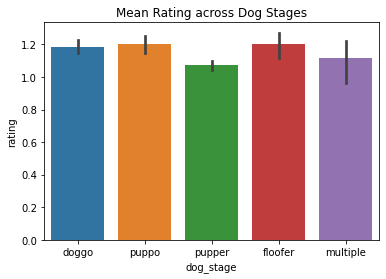

In [72]:
sns.barplot(data=rated_categories, x='dog_stage', y='rating')
_ = plt.title('Mean Rating across Dog Stages')

if os.path.isfile('Visualizations/Mean_Rating_across_Dog_Stages.png') is False:
    _ = plt.savefig('Visualizations/Mean_Rating_across_Dog_Stages.png', bbox_inches='tight', facecolor='white')

The mean rating across the stages are close to each other. Keeping the different sample sizes in mind, our sample means may not be a good measure of difference in distributions.

We can carry out a hypothesis test to check whether the ratings across the stages are from the same distribution.

Null Hypothesis: The ratings have the same distribution across the 5 stages.

Alternative Hypothesis: The ratings are distributed differently across the 5 stages.

The Kruskal–Wallis Test is used as there are few number of samples in the poppo, multiple and floofer stages. The significance level is 0.05.

In [73]:
pingouin.kruskal(data=rated_categories, dv='rating', between='dog_stage')

,Source,ddof1,H,p-unc
Kruskal,dog_stage,4,38.433506,9.119723e-08


Given that the p-unc value is less than our significance level, the Kruskal–Wallis Test suggests that given the data at hand we reject the null hypothesis, and assume the ratings across the 5 dog stages are distributed differently.

### Research Question 2:

> How have the mean ratings varied across the years?

In [74]:
df_master.timestamp.agg([np.max,np.min])

amax   2017-07-26 15:59:51+00:00
amin   2015-12-02 21:06:56+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [75]:
df_time_series = pd.concat([df_master[['timestamp']], rating], axis=1)

In [76]:
df_time_series.rename({0:'rating'}, axis=1, inplace=True)

In [77]:
df_time_series.head()

,timestamp,rating
0,2017-07-26 15:59:51+00:00,1.4
1,2017-07-25 01:55:32+00:00,1.3
2,2017-07-24 17:02:04+00:00,1.3
3,2017-07-15 23:25:31+00:00,1.2
4,2017-07-09 21:29:42+00:00,1.2


In [78]:
df_time_series.set_index('timestamp', inplace=True)

We will visualize the mean ratings over 3 month periods to get a sense of when dogs received the most generous ratings.

In [79]:
quarterly_means = df_time_series.resample('Q').mean()

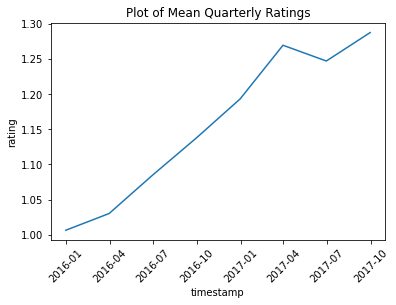

In [80]:
sns.lineplot(data=quarterly_means, x='timestamp', y='rating')
_ = plt.xticks(rotation=45)
_ = plt.title('Plot of Mean Quarterly Ratings')

if os.path.isfile('Visualizations/Mean_Quarterly_Ratings.png') is False:
    _ = plt.savefig('Visualizations/Mean_Quarterly_Ratings.png', bbox_inches='tight', facecolor='white')

From the visualization, it is evident that the 2017-07 to 2017-10 period saw dogs receive the highest ratings on average. There is also an increasing trend in the ratings received from 2016-01 to 2017-10.

### Research Question 3:

> For high and low confidence levels, which of the neural networks 3 predictions have a higher proportion of success?

After creating three dataframes to store the three predictions, we designate a confidence level of 0.5 or greater as high confidence and all others as low confidence predictions. 

In [81]:
df_p1 = df_master[['p1_conf', 'p1_dog']]
df_p2 = df_master[['p2_conf', 'p2_dog']]
df_p3 = df_master[['p3_conf', 'p3_dog']]

In [82]:
df_p1.loc[:,'p1_conf'] = df_p1['p1_conf'].apply(lambda x: 'High' if x >= 0.5 else 'Low')
df_p2.loc[:,'p2_conf'] = df_p2['p2_conf'].apply(lambda x: 'High' if x >= 0.5 else 'Low')
df_p3.loc[:,'p3_conf'] = df_p3['p3_conf'].apply(lambda x: 'High' if x >= 0.5 else 'Low')

C:\Users\Nasir Ibrahim\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [83]:
df_p1['p1_conf'].value_counts()

High    193
Low     112
Name: p1_conf, dtype: int64

In [84]:
df_p1['p1_conf'].value_counts(normalize=True)

High    0.632787
Low     0.367213
Name: p1_conf, dtype: float64

In [85]:
df_p2['p2_conf'].value_counts()

Low    305
Name: p2_conf, dtype: int64

In [86]:
df_p3['p3_conf'].value_counts()

Low    305
Name: p3_conf, dtype: int64

In [87]:
df_p1.groupby('p1_conf').mean()

,p1_dog
p1_conf,
High,0.818653
Low,0.616071


In [88]:
df_p2.groupby('p2_conf').mean()

,p2_dog
p2_conf,
Low,0.763934


In [89]:
df_p3.groupby('p3_conf').mean()

,p3_dog
p3_conf,
Low,0.727869


In [90]:
df_p1['p1_dog'].mean()

0.7442622950819672

In [91]:
df_p2['p2_dog'].mean()

0.7639344262295082

In [92]:
df_p3['p3_dog'].mean()

0.7278688524590164

We see that the first prediction has high confidence 63.27% of the time while the other two are all low confidence. The second predicts most accurately, with a success rate of 76.39%.

### Research Question 4:

> What is the relationship between display text length and retweet and favorite counts?

In [93]:
df_popularity = pd.DataFrame()
df_popularity['display_text_length'] = df_master['display_text_length']
df_popularity['retweets_plus_favorites'] = df_master['retweet_count'] + df_master['favorite_count']

In [94]:
df_popularity.head()

,display_text_length,retweets_plus_favorites
0,133,34082
1,106,50439
2,118,15241
3,131,21192
4,140,20461


In [95]:
df_popularity.describe()

,display_text_length,retweets_plus_favorites
count,305.000000,305.000000
mean,109.327869,13053.849180
std,26.027517,22829.601537
min,32.000000,660.000000
25%,92.000000,3012.000000
50%,114.000000,6115.000000
75%,134.000000,14059.000000
max,144.000000,215803.000000


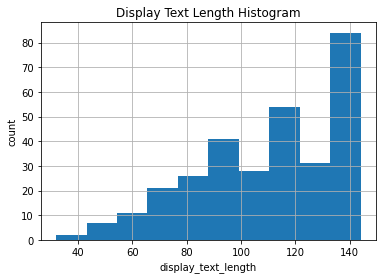

In [96]:
_ = df_popularity['display_text_length'].hist(bins=10)
_ = plt.title('Display Text Length Histogram')
_ = plt.xlabel('display_text_length')
_ = plt.ylabel('count')

if os.path.isfile('Visualizations/Display_Text_Length_Histogram.png') is False:
    _ = plt.savefig('Visualizations/Display_Text_Length_Histogram.png', bbox_inches='tight', facecolor='white')

We see that there is a higher proportion of texts with a length of 80 or greater.

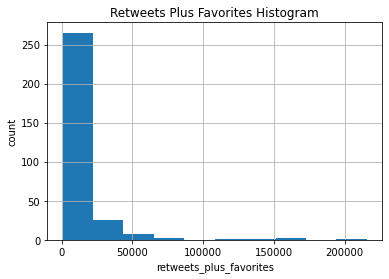

In [97]:
_ = df_popularity['retweets_plus_favorites'].hist(bins=10)
_ = plt.title('Retweets Plus Favorites Histogram')
_ = plt.xlabel('retweets_plus_favorites')
_ = plt.ylabel('count')

if os.path.isfile('Visualizations/Retweets_Plus_Favorites_Histogram.png') is False:
    _ = plt.savefig('Visualizations/Retweets_Plus_Favorites_Histogram.png', bbox_inches='tight', facecolor='white')

From the above histogram, we see that most tweets simply won't go viral.

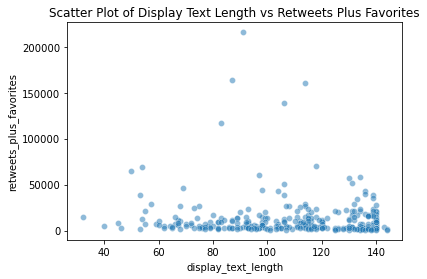

In [98]:
sns.scatterplot(data=df_popularity, x='display_text_length', y='retweets_plus_favorites', alpha=0.5)
_ = plt.title('Scatter Plot of Display Text Length vs Retweets Plus Favorites')

if os.path.isfile('Visualizations/Scatter_Plot_of_Display_Text_Length_vs_Retweets_Plus_Favorites.png') is False:
    _ = plt.savefig('Visualizations/Scatter_Plot_of_Display_Text_Length_vs_Retweets_Plus_Favorites.png', bbox_inches='tight', facecolor='white')

In [99]:
df_popularity.corr()

,display_text_length,retweets_plus_favorites
display_text_length,1.000000,-0.081535
retweets_plus_favorites,-0.081535,1.000000


From the scatter plot and correlation values, we see that display text length hardly affects the popularity of the tweets.